## The Puzzle Of The Lonesome King

This is my solution for the five thirty eight riddler due on November 20th 2016. The problem statement is at http://fivethirtyeight.com/features/the-puzzle-of-the-lonesome-king/

In order for the king to be wedded there needs to be only one person not picked at the end of one, or many rounds of picking. As a base case lets calculate the probability of only one person being not chosen at the end of one round of picking with $N$ people.

If we think of being chosen by someone as a "success" this is equivalent to a binomial distribution. In this case we want the probability of zero "successes" if $N-1$ people (since the person can't pick themselves) with probability $\frac{1}{N-1}$

This works out to

$f\left(0; N-1, \frac{1}{N-1}\right)=\binom{N-1}{0}\left(\frac{1}{N-1}\right)^{0}\left(1-\frac{1}{N-1}\right)^{N-1}$

which simplifies to 

$f\left(0; N-1, \frac{1}{N-1}\right)=\left(1-\frac{1}{N-1}\right)^{N-1}$

Now this is nowhere near the whole problem, as there are many ways that you can get to only one person left. If we start off with 10 people, 5 can get eliminated on the first go around, then another 4 (and the king marries). We can come up with a relationfor the probability that there are $Q$ people left after a round which starts with $N$ people. We do this by multiplying our old distribution (the chance of this person being chosen zero times) together $Q$ times and changing the probability each time to account for the fact that if we've tagged someone as "not chosen" they can't go back into the pool on the next iteration of the multiplication.

$\xi\left(Q,N\right)=\prod_{i=0}^{Q}\left(1-\frac{1}{N-i-1}\right)^{N-1}$

I've made the same simplification as above (getting rid of the choose, simplifiying everywhere that I can with $k=0$). We can simplify this further by pulling the exponent outside the product, putting the 1 and the fraction over a common denominator, and playing around with factorials to get.

$\xi\left(Q,N\right)=\left(1-\frac{Q}{N-1}\right)^{N-1}$

Now we have to worry about how to string this together into paths to marriage/bachelorhood for our king. At this point it's helpful to draw a diagram for a simple case. Lets choose a simple case of $N=6$ (six people in the running)

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://i.imgur.com/j3jbhRr.jpg")

In this diagram each round of picking results in a number of people left, with a probability. For example, after the first round there will be four people left with p=0.00032. After that, there will be one person left with probability 0.30. To get the probability of the king being married we need to start at all the leaf nodes with one person left and multiply our way up, summing when there is two nonzero probabilities a root node.

In this case we I have left in a lot of extraenous zeros. For example if we start off with N people, it is impossible to have $N-1$ people left after the first round, everyone would have to pick the same person, except that that person can't pick themselves. This means that if there is ever two people left, the king will go unmarried (they can only pick eachother)

In this case we get a probability of the king finding love of $0.30\times 0.00032+0.25\times0.010 + 0.33\approx 0.33$

We can encode this whole process into a single formula as 

$A\left(N\right)=\sum_{i=1}^{N-1}\xi\left(i, N\right)A\left(i\right)$

$A\left(N\right)=\sum_{i=1}^{N-1}\left(1-\frac{i}{N-1}\right)^{N-1}A\left(i\right)$

So at this point this is a really annoying recurrance relation that exceeds my math skills to solve. Lets turn to numerical methods. If we code up our recursion relation and type in 6 we get

In [19]:
import numpy as np

N=6
A=np.zeros(N+1)
A[1]=1.0

def prob_product(Q, N):
    # This calculates that prefactor in the recusion relation
    return np.power((N-Q-1.0)/(N-1.0),N-1.0)

# Actually do the recusion relation
for i in range(2,N+1):    
    A[i]=0.0
    j=np.arange(1,i-1)
    A[i]=np.sum(prob_product(j,i)*A[j])

print A[-1]

0.330334814815


Which is the answer we got by hand! If we put in 56000 we get a slightly larger number. This is because there are more ways to get to 1 person with larger numbers, and all the paths used by smaller populations remain in play.

In [29]:
import numpy as np

N=56000
A=np.zeros(N+1)
A[1]=1.0

def prob_product(Q, N):
    # This calculates that prefactor in the recusion relation
    return np.power((N-Q-1.0)/(N-1.0),N-1.0)

# Actually do the recusion relation
for i in range(2,N+1):    
    A[i]=0.0
    j=np.arange(1,i-1)
    A[i]=np.sum(prob_product(j,i)*A[j])

print A[-1]

0.389198513383


So it is more likely that nobody gets wedded (probability $\approx 0.61$).

So it's important to note that we could have made a bunch of simplifications here. If $N$ is even kinda big, and $i$ is also even kinda big the probability is nearly zero (e.g. The probability that given 100 people, 10 don't get picked is $2\times10^{-5}$). We could safely call tons of these zero but that would take longer to code.

### Bonus time!

If we have a lot of people, it's helpful to look at our recursion relation again

$A\left(N\right)=\sum_{i=1}^{N-1}\left(1-\frac{i}{N-1}\right)^{N-1}A\left(i\right)$

if N is large $\left(1-\frac{i}{N-1}\right)^{N-1}$ is basically going to always be 1. Since this is a recursion relation it means that $A(\textrm{big number})\approx A(\textrm{big number+1})$. This makes sense, the first round of choices is going to see basically everyone picked, and a handful of people not picked. Then the problem becomes the same every time, it basically "resets" with a small number of people.

We can see this if we plot the probability he gets married as a function of population. If there is one person in the group he gets married for sure, if there are two he can't get married, then the probability increases, but asymtotes. 

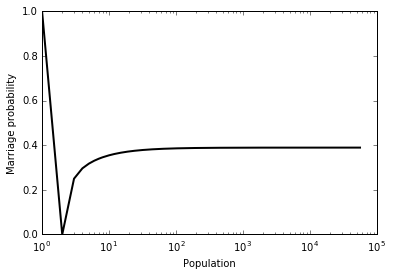

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

x=range(0,N+1)
y=A

plt.figure()
plt.semilogx(x, y, 
             color='black', 
             linewidth = 2)
plt.xlabel("Population")
plt.ylabel("Marriage probability")
plt.show()

So the answer to the bonus question is that if the kingdom is exactly 1 person, it's a sure thing that he'll get married, otherwise a bigger kingdom results in more paths to marriage, but really after a few hundred the probability doesnt' change much.